# Valores críticos de MacKinnon para test de cointegración

In [1]:
import numpy as np
import pandas as pd

pd.set_option('precision',5)

In [19]:
GITHUB_REPO = "https://raw.githubusercontent.com/randall-romero/econometria/master/data/"
DATAPATH = GITHUB_REPO if 'google.colab' in str(get_ipython()) else '../data/'

Necesitamos importar una clase de un módulo local. Para ello, usualmente es suficiente con tener el módulo (archivo py) en la misma carpeta que este cuaderno, pero eso no funcionaría cuando se corre en Colab. Por ello, añadimos explícitamente la carpeta que contiene ese módulo en el path de Python.

In [3]:
import sys
sys.path.insert(1, DATAPATH)

## Una clase para el test de MacKinnon

In [4]:
from mackinnon import MacKinnon  # este módulo contiene herramientas para calcular valores críticos de MacKinnon
mk = MacKinnon()

El valor crítico al 5% para determinar si 5 series están cointegradas, basados en 100 observaciones, incluyendo intercepto y tendencia lineal

In [5]:
mk('ct', N=5, T=100, level='5%')

nan

Si no especificamos el nivel de significancia, la función muestra los valores usuales de 1%, 5% y 10%

In [6]:
mk('ct', N=5, T=100)

Level
1%    NaN
5%    NaN
10%   NaN
dtype: float64

Para obtener los coeficientes del polinomio de approximación, usamos **get_matrix**

In [7]:
mk.get_matrix('ct', N=5)

,beta3,beta2,beta1,beta_inf
Level,,,,
1%,NaN,50.65,-59.63,0.00012
5%,NaN,91.36,-22.66,0.00007
10%,NaN,76.78,-10.24,0.00005


In [8]:
mk.get_matrix('ct', N=5, level='5%')

beta3            NaN
beta2       91.36000
beta1      -22.66000
beta_inf     0.00007
Name: 5%, dtype: float64

Evaluamos otra vez el valor crítico al 5% para determinar si 5 series están cointegradas, basados en 100 observaciones, incluyendo intercepto y tendencia lineal, esta vez evaluando el polinomio a partir de los coeficientes

In [9]:
b3,b2,b1,b0 = mk.get_matrix('ct', N=5, level='5%')
T = 100
b0 + b1 / T + b2 / T**2 + b3 / T**3

nan

Igual que en el caso anterior, pero usando la función **polyval** de numpy para evaluar el polinomio

In [10]:
tb = mk.get_matrix('ct', N=5, level='5%')
np.polyval(tb, 1/T)

nan

## Valores críticos versus tamaño de muestra
Para muestras pequeñas, los valores críticos son mayores (en valor absoluto)

<AxesSubplot:>

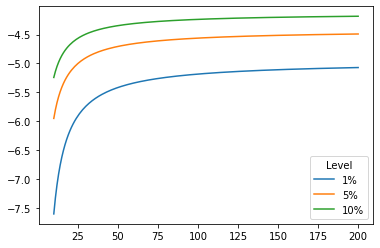

In [11]:
sample_sizes = np.arange(10, 201)
vT = pd.DataFrame([MacKinnon()('c',5,T) for T in sample_sizes], 
                 index=sample_sizes)
vT.plot()


## Valores críticos versus número de series
Entre más series hayan en el vector de cointegración, los valores críticos son mayores (en valor absoluto)

<AxesSubplot:>

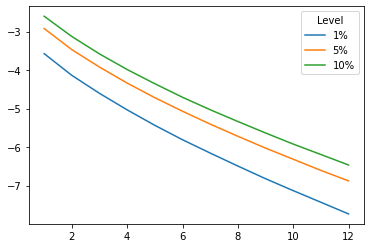

In [12]:
number_of_series = np.arange(1, 13)
vN = pd.DataFrame([MacKinnon()('c',N,48) for N in number_of_series], 
                 index=number_of_series)
vN.plot()

## Valores críticos versus tendencias determinísticas
Entre más elementos haya en la tendencia determinística, mayores serán los valores críticos (en valor absoluto)

<AxesSubplot:xlabel='Level'>

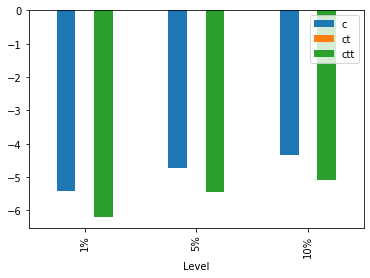

In [13]:
variants = ['c','ct', 'ctt']
vV = pd.DataFrame([MacKinnon()(v,5,48) for v in variants], 
                 index=variants)
vV.T.plot(kind='bar')